In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager


In [398]:
treino = pd.read_csv('titanic/train.csv')
teste = pd.read_csv('titanic/test.csv')

In [399]:
treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [400]:
teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [401]:
treino = treino.drop(columns=['Name', 'Fare', 'PassengerId', 'Cabin', 'Ticket', 'PassengerId'])

treino.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,NaN,0,0,Q
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C


In [402]:
teste = teste.drop(columns=['Name', 'Fare', 'PassengerId', 'Cabin', 'Ticket', 'PassengerId'])
teste.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [403]:
treino.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [404]:
teste.describe()

,Pclass,Age,SibSp,Parch
count,418.000000,332.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344
std,0.841838,14.181209,0.896760,0.981429
min,1.000000,0.170000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000
75%,3.000000,39.000000,1.000000,0.000000
max,3.000000,76.000000,8.000000,9.000000


In [405]:
print(treino.shape)
print(teste.shape)

(891, 7)
(418, 6)


In [406]:
treino.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [407]:
teste.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

Converter os valores do embarque para análisar no gráficos se esses dados parecem ser importantes ou não

In [408]:
treino = treino.dropna(subset=['Embarked'])

In [409]:
treino.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [410]:
teste.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [411]:
treino['Embarked'] = treino['Embarked'].replace({'Q': 1, 'S': 2, 'C': 3})
teste['Embarked'] = teste['Embarked'].replace({'Q': 1, 'S': 2, 'C': 3})

/tmp/ipykernel_18861/2351173612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  treino['Embarked'] = treino['Embarked'].replace({'Q': 1, 'S': 2, 'C': 3})
/tmp/ipykernel_18861/2351173612.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  teste['Embarked'] = teste['Embarked'].replace({'Q': 1, 'S': 2, 'C': 3})


In [412]:
treino_tirando_idade = treino.dropna(subset=['Age'])
teste_tirando_idade = teste.dropna(subset=['Age'])

*   Trocando 1 para Homem 
*   Trocando 0 para Mulher

In [413]:
treino_tirando_idade['Sex'] = treino_tirando_idade['Sex'].replace({'male': 1, 'female': 0})
teste_tirando_idade['Sex'] = teste_tirando_idade['Sex'].replace({'male': 1, 'female': 0})

/tmp/ipykernel_18861/2877580494.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  treino_tirando_idade['Sex'] = treino_tirando_idade['Sex'].replace({'male': 1, 'female': 0})
/tmp/ipykernel_18861/2877580494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino_tirando_idade['Sex'] = treino_tirando_idade['Sex'].replace({'male': 1, 'female': 0})
/tmp/ipykernel_18861/2877580494.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, ex

In [414]:
treino_tirando_idade

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,3
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,1
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
889,1,1,1,26.0,0,0,3


In [415]:
treino['Age'] = treino['Age'].fillna(29)
teste['Age'] = teste['Age'].fillna(30)

In [416]:
treino['Sex'] = treino['Sex'].replace({'male': 1, 'female': 0})
teste['Sex'] = teste['Sex'].replace({'male': 1, 'female': 0})

/tmp/ipykernel_18861/265562265.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  treino['Sex'] = treino['Sex'].replace({'male': 1, 'female': 0})
/tmp/ipykernel_18861/265562265.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  teste['Sex'] = teste['Sex'].replace({'male': 1, 'female': 0})


In [417]:
treino

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,3
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,29.0,1,2,2
889,1,1,1,26.0,0,0,3


<Figure size 1000x1500 with 0 Axes>

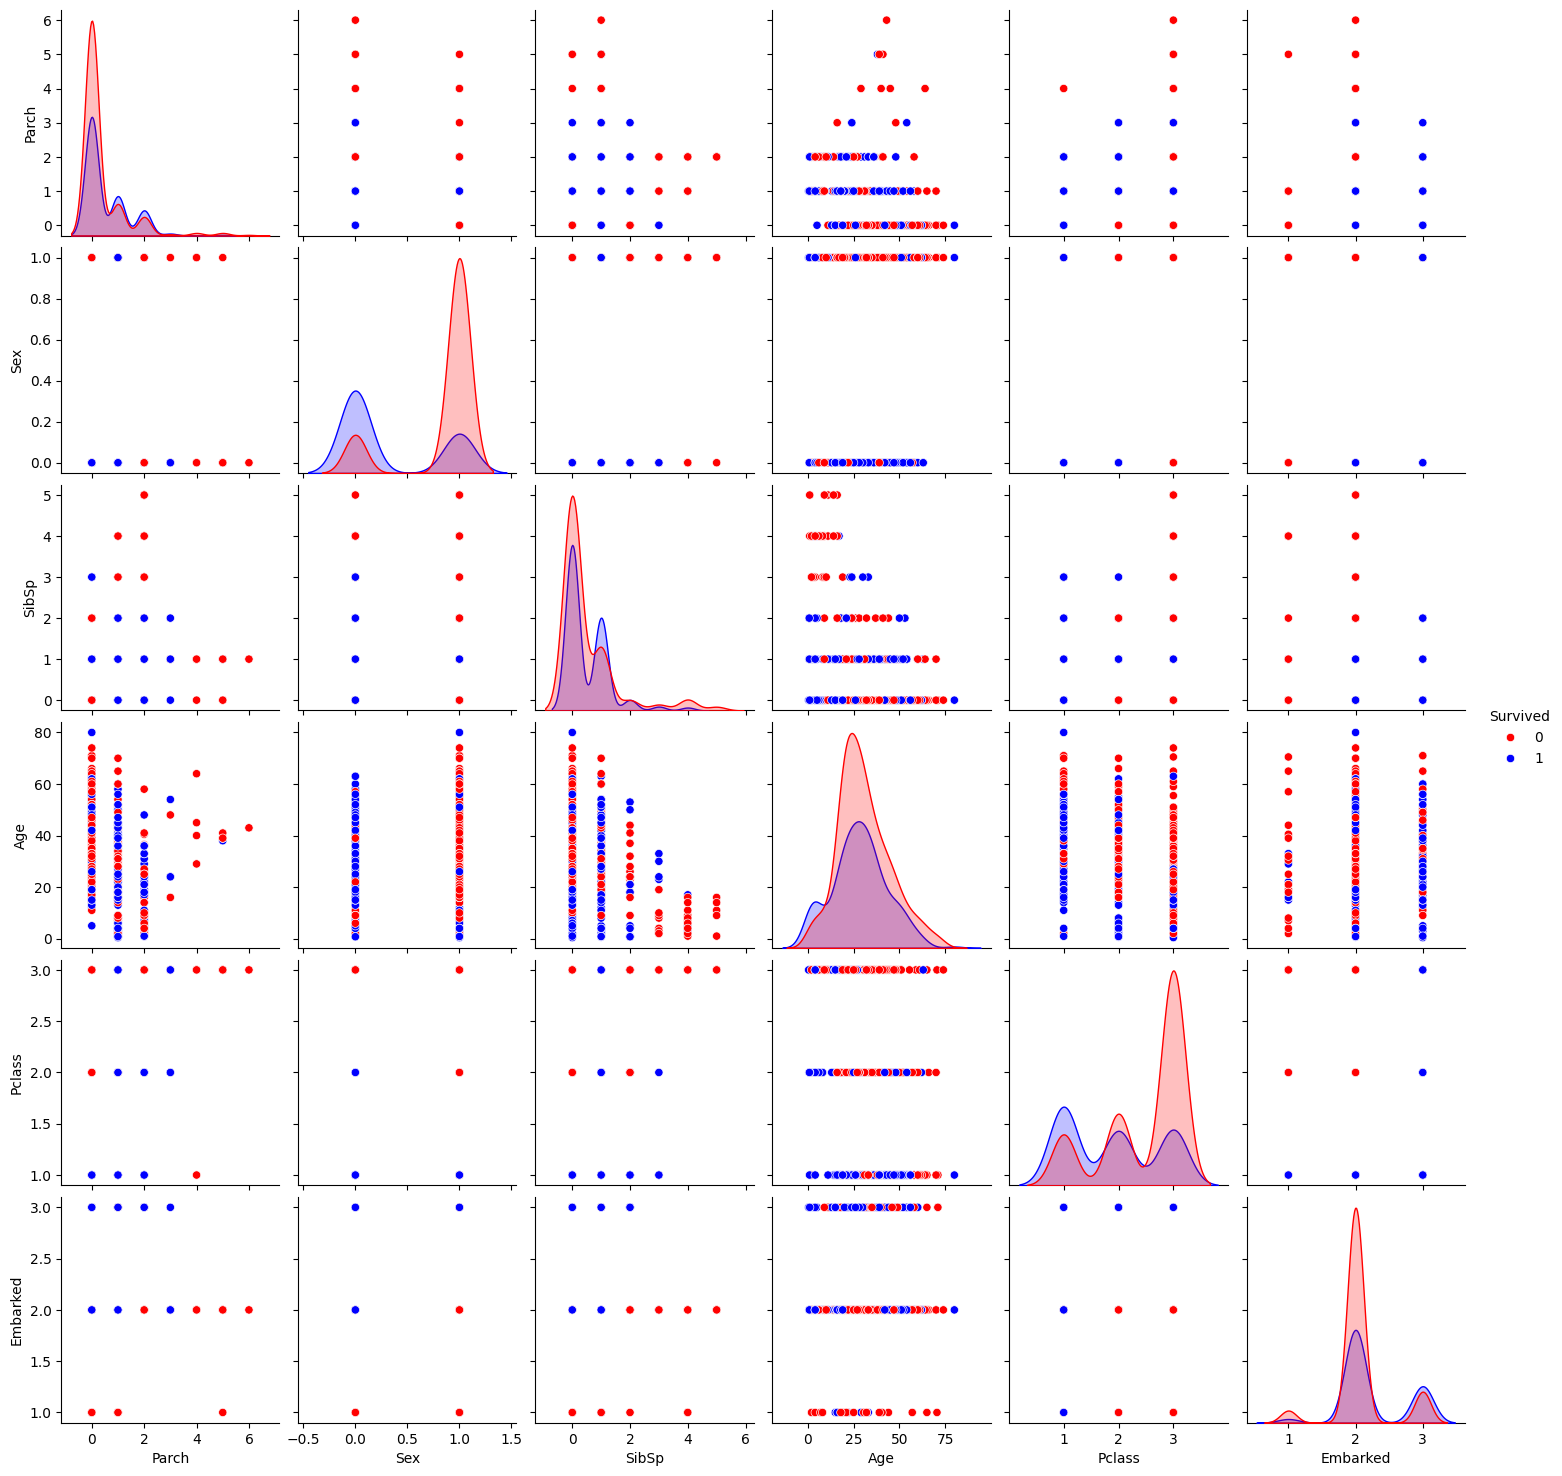

In [418]:
plt.figure(figsize=(10,15))
sns.pairplot(treino_tirando_idade, x_vars=['Parch', 'Sex', 'SibSp', 'Age', 'Pclass', 'Embarked'], y_vars=['Parch', 'Sex', 'SibSp', 'Age', 'Pclass', 'Embarked'], hue='Survived', palette={1: 'blue', 0:'red'})

<Figure size 1000x1500 with 0 Axes>

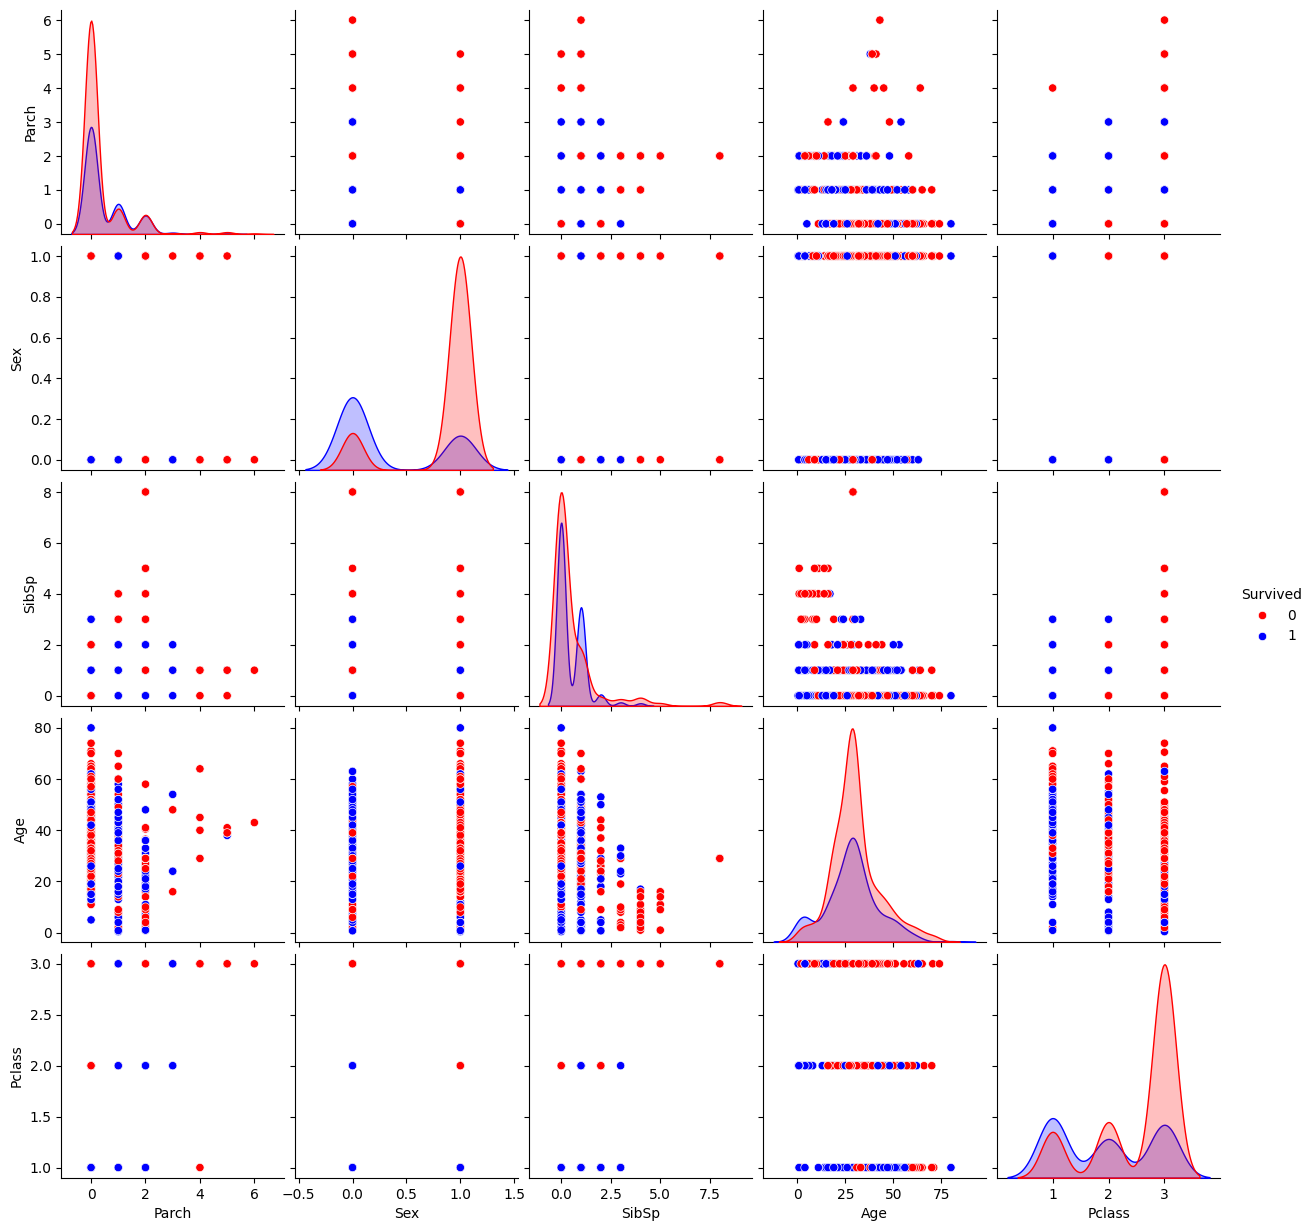

In [419]:
plt.figure(figsize=(10,15))
sns.pairplot(treino, x_vars=['Parch', 'Sex', 'SibSp', 'Age', 'Pclass'], y_vars=['Parch', 'Sex', 'SibSp', 'Age', 'Pclass'], hue='Survived', palette={1: 'blue', 0:'red'})

Conclusões:

*   Ser da terceira classe fator determinante se o passageiro morreu ou não
*   Ter 3 ou mais parentes abordo, também é determinante
*   Ser homem é um fato relevante para saber se passageiro morreu

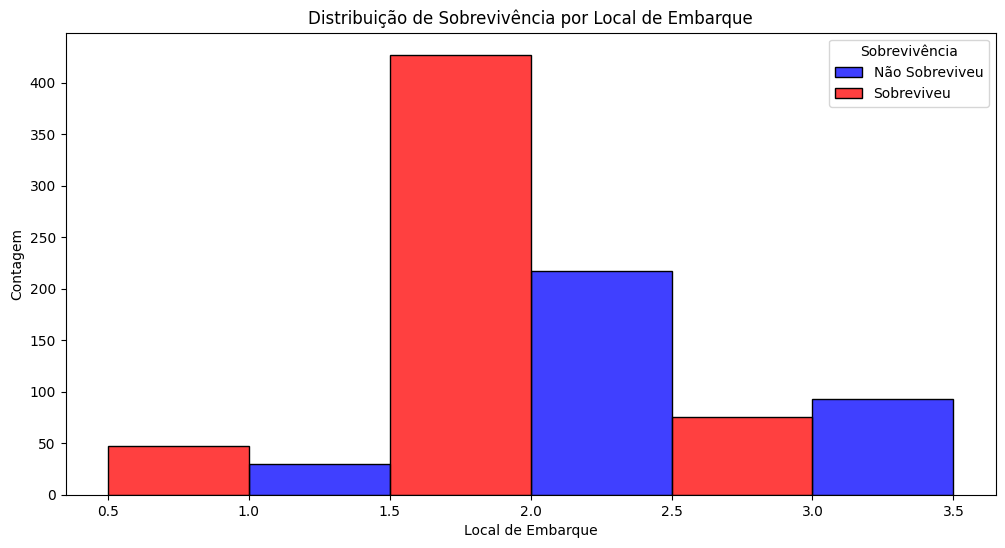

In [420]:
plt.figure(figsize=(12, 6))
sns.histplot(data=treino, x='Embarked', hue='Survived', multiple='dodge', palette={1: 'blue', 0: 'red'}, discrete=True)

plt.xlabel('Local de Embarque')
plt.ylabel('Contagem')
plt.title('Distribuição de Sobrevivência por Local de Embarque')
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

In [421]:
treino.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.072699,-0.034040,0.083151,0.126753
Pclass,-0.335549,1.000000,0.127741,-0.331588,0.081656,0.016824,-0.307324
Sex,-0.541585,0.127741,1.000000,0.088257,-0.116348,-0.247508,-0.023175
Age,-0.072699,-0.331588,0.088257,1.000000,-0.232227,-0.175512,0.036169
SibSp,-0.034040,0.081656,-0.116348,-0.232227,1.000000,0.414542,-0.031095
Parch,0.083151,0.016824,-0.247508,-0.175512,0.414542,1.000000,0.035756
Embarked,0.126753,-0.307324,-0.023175,0.036169,-0.031095,0.035756,1.000000


In [422]:
treino_tirando_idade.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.189657
Pclass,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.297517
Sex,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.077391
Age,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.042340
SibSp,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,-0.062028
Parch,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,-0.004120
Embarked,0.189657,-0.297517,-0.077391,0.042340,-0.062028,-0.004120,1.000000


<Axes: >

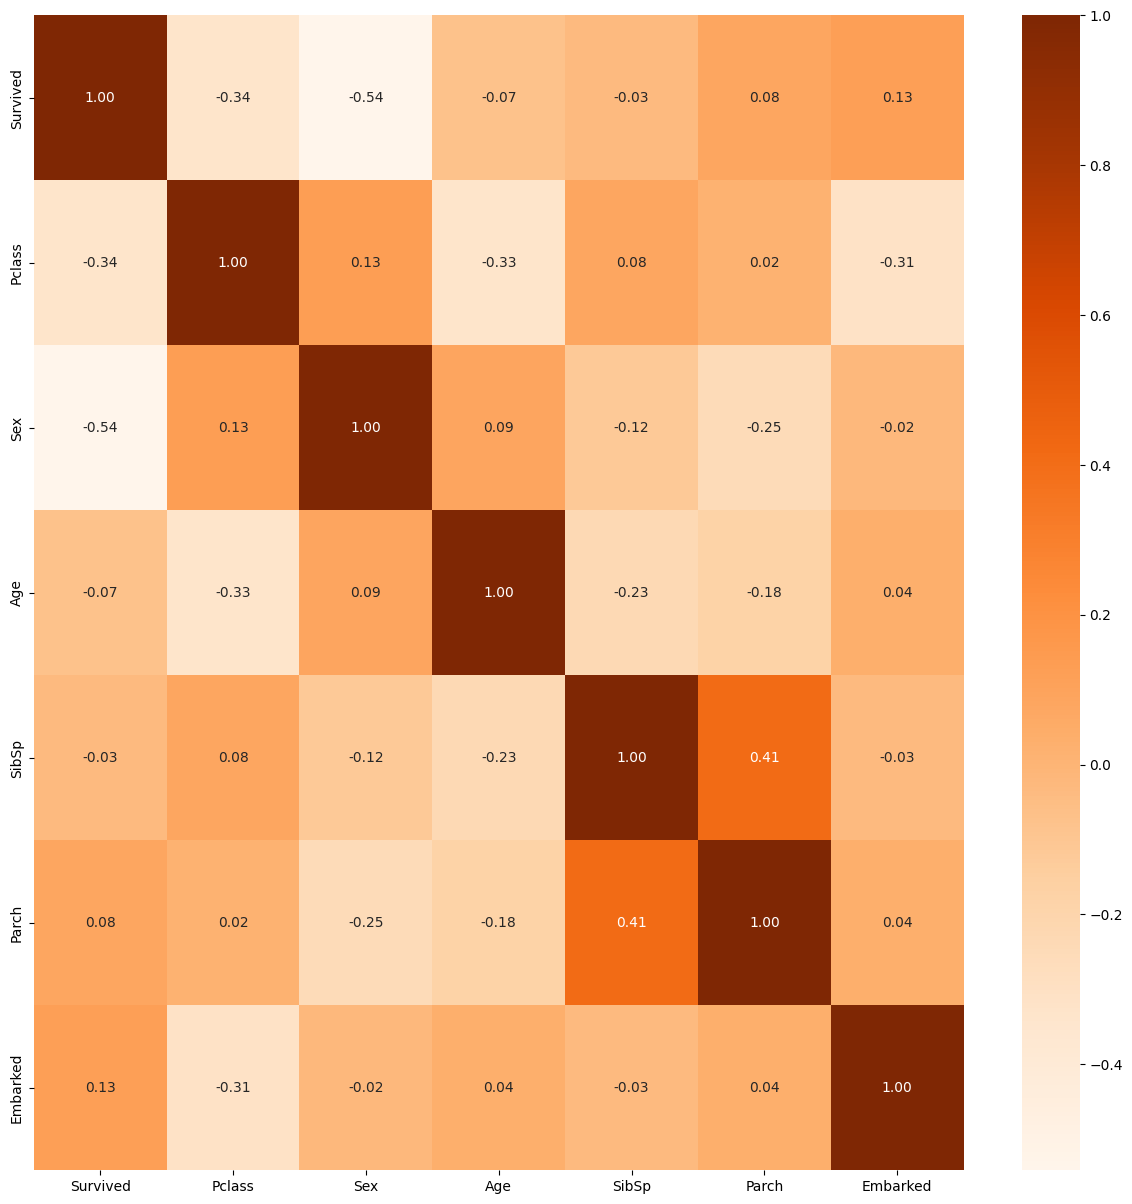

In [423]:
plt.figure(figsize=(15,15))
sns.heatmap(treino.corr(), annot=True, cmap='Oranges', fmt='.2f')



<Axes: >

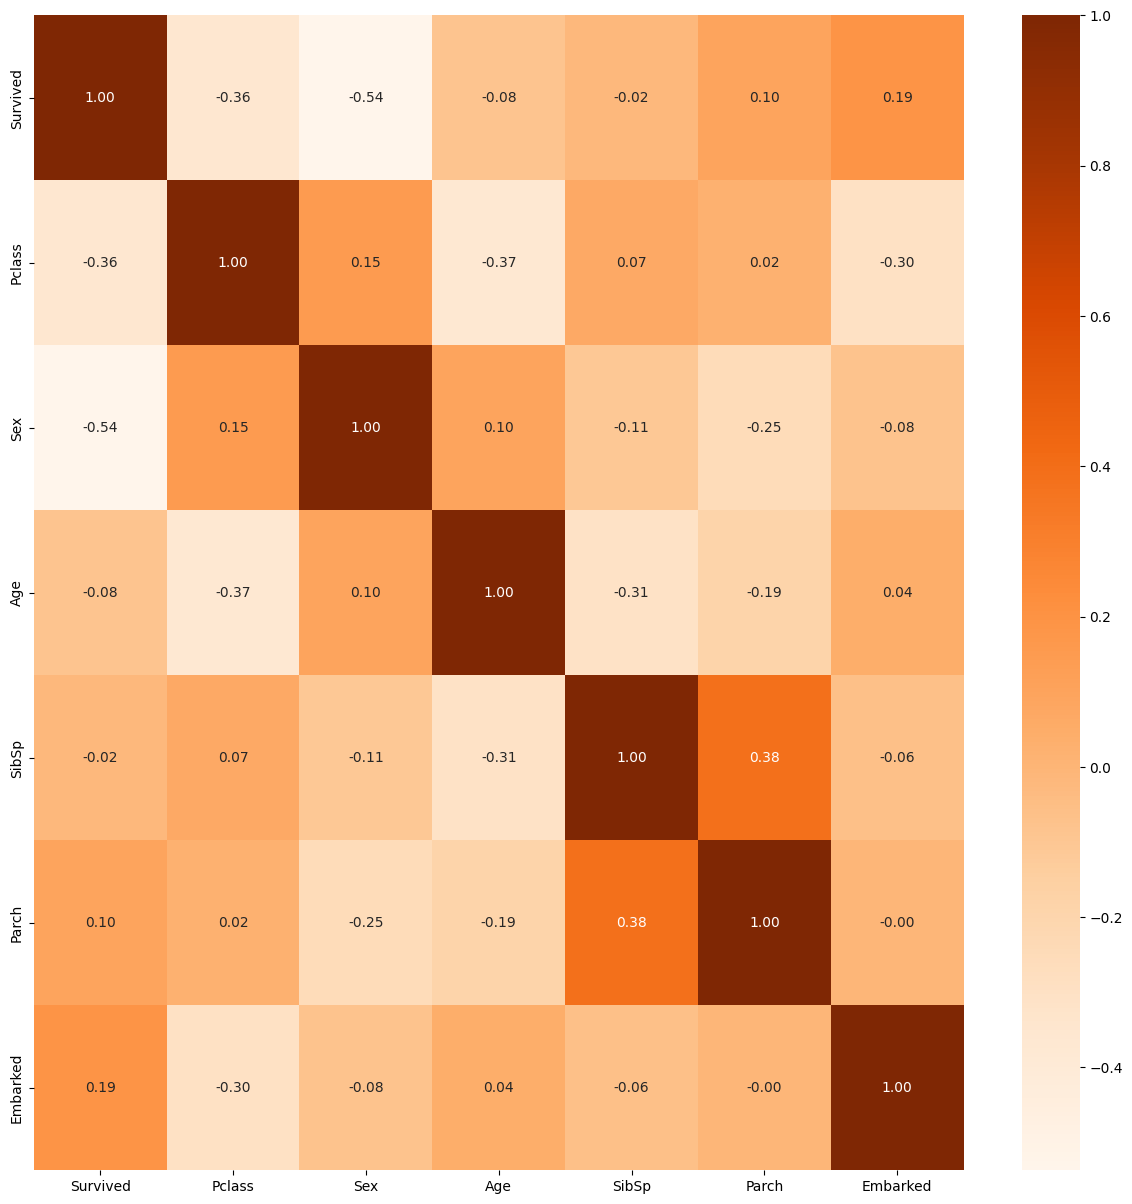

In [424]:
plt.figure(figsize=(15,15))
sns.heatmap(treino_tirando_idade.corr(), annot=True, cmap='Oranges', fmt='.2f')



In [425]:
y_train = treino['Survived']
X_train = treino.drop(columns=['Survived'])

y_train_no_age = treino_tirando_idade['Survived']
X_train_no_age = treino_tirando_idade.drop(columns=['Survived'])

#   Agora será feito o treinamento dos modelos

*   Próximas 3 céluas são boas práticas que achei na internet

In [426]:
comparacao_modelos = pd.DataFrame(columns=['Modelo', 'Acurácia']) # Esse Data Frame tem o objetivo de armazenar os valores das métricas para facilitar a comparação dos valores.


In [427]:
# Função para comparar e ordenar os modelos
def comparar(Nome_do_modelo, valor_acuracia):  
    global comparacao_modelos
    
    # Criando o DataFrame temporário com os novos dados
    novo_modelo = pd.DataFrame({'Modelo': [Nome_do_modelo], 'Acurácia': [valor_acuracia]})
    
    # Concatenando o novo modelo ao DataFrame comparacao_modelos
    comparacao_modelos = pd.concat([comparacao_modelos, novo_modelo], ignore_index=True)
    
    # Ordenando por acurácia de forma decrescente
    comparacao_modelos.sort_values(ascending=False, by='Acurácia', inplace=True)
    
    # Removendo possíveis duplicatas
    comparacao_modelos.drop_duplicates(inplace=True)
    
    # Exibindo o DataFrame
    display(comparacao_modelos)

In [428]:


#a semente para que as amostram sejam as mesmas
SEED = 2021
np.random.seed(SEED)



*   Dummy Classificator
    *   O Dummy Classifier, foi o primeiro a ser escolhido já que é usado para ter uma base de performance dos modelos e suas regras de classificação são simples. Não é indicado para problemas reais. Por exemplo, ele pode chutar todos valores 0 ou 1 e com isso ter uma acurácia alta mas isso não quer dizer que prediz alguma coisa.

In [429]:
from sklearn.dummy import DummyClassifier

In [430]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=SEED)
dummy_model.fit(X_train, y_train)

DummyClassifier(random_state=2021, strategy='most_frequent')

In [431]:
dummy_model.fit(X_train_no_age, y_train_no_age)

DummyClassifier(random_state=2021, strategy='most_frequent')

In [432]:
acuracia_dummy = round(dummy_model.score(X_train, y_train)*100, 2)

display(f"A acurácia do modelo Dummy Classifier é de {acuracia_dummy} %")

'A acurácia do modelo Dummy Classifier é de 61.75 %'

In [433]:
acuracia_dummy_no_age = round(dummy_model.score(X_train_no_age, y_train_no_age)*100, 2)

display(f"A acurácia do modelo Dummy Classifier é de {acuracia_dummy_no_age} %")

'A acurácia do modelo Dummy Classifier é de 59.55 %'

In [434]:
comparar("Dummy_classifier", acuracia_dummy)
comparar("Dummy_classifier_no_age", acuracia_dummy_no_age)

/tmp/ipykernel_18861/1212414404.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparacao_modelos = pd.concat([comparacao_modelos, novo_modelo], ignore_index=True)


,Modelo,Acurácia
0,Dummy_classifier,61.75


,Modelo,Acurácia
0,Dummy_classifier,61.75
1,Dummy_classifier_no_age,59.55


*   Regressão Logística

In [435]:
from sklearn.linear_model import LogisticRegression

In [436]:
RL_model = LogisticRegression(solver='lbfgs', random_state=SEED)
RL_model.fit(X_train, y_train)

LogisticRegression(random_state=2021)

In [437]:
Rl_model_no_age = RL_model.fit(X_train_no_age, y_train_no_age)

In [439]:
acuracia_RL = round(RL_model.score(X_train, y_train)*100, 2)
display(f"A acurácia do modelo de Regressão Logística é de {acuracia_RL} %")

'A acurácia do modelo de Regressão Logística é de 78.29 %'

In [440]:
acuracia_RL_no_age = round(Rl_model_no_age.score(X_train_no_age, y_train_no_age)*100, 2)
display(f"A acurácia do modelo de Regressão Logística é de {acuracia_RL_no_age} %")

'A acurácia do modelo de Regressão Logística é de 80.48 %'